# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } \varphi_{ext}$

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=20
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

# Qubit parameters 1 

ng=0.5

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

#Qubit parameters 2 

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations

a=np.pi-0.15
b=np.pi+0.16
phi_ext=np.arange(a,b,0.03) #0.06
Energies=[]
Energies2=[]

In [4]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=2*np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL 2
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [5]:
# Calculations 1

for phi1 in phi_ext:
    print("Step for phi_ext = ",phi1)
    H=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng,phi1,alpha)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    vals, _ = eigsh(H, k=2, which='SA')
    #vals,_=np.linalg.eigh(H)
    print(vals[0],vals[1])
    print("Eigenvalues calculated")
    Energies.append(vals)

Step for phi_ext =  2.991592653589793
Hamiltonian built, len(H)= 741321
1.7306080547070324 1.8143843097813275
Eigenvalues calculated
Step for phi_ext =  3.021592653589793
Hamiltonian built, len(H)= 741321
1.7387751849583204 1.8058110081737915
Eigenvalues calculated
Step for phi_ext =  3.051592653589793
Hamiltonian built, len(H)= 741321
1.746992270314312 1.7972777794341712
Eigenvalues calculated
Step for phi_ext =  3.0815926535897926
Hamiltonian built, len(H)= 741321
1.7552581608873397 1.788785947733207
Eigenvalues calculated
Step for phi_ext =  3.1115926535897924
Hamiltonian built, len(H)= 741321
1.7635716833655002 1.7803368108185094
Eigenvalues calculated
Step for phi_ext =  3.1415926535897922
Hamiltonian built, len(H)= 741321
1.7719316405392915 1.7719316405393606
Eigenvalues calculated
Step for phi_ext =  3.171592653589792
Hamiltonian built, len(H)= 741321
1.7635716833650696 1.7803368108184403
Eigenvalues calculated
Step for phi_ext =  3.201592653589792
Hamiltonian built, len(H)= 741

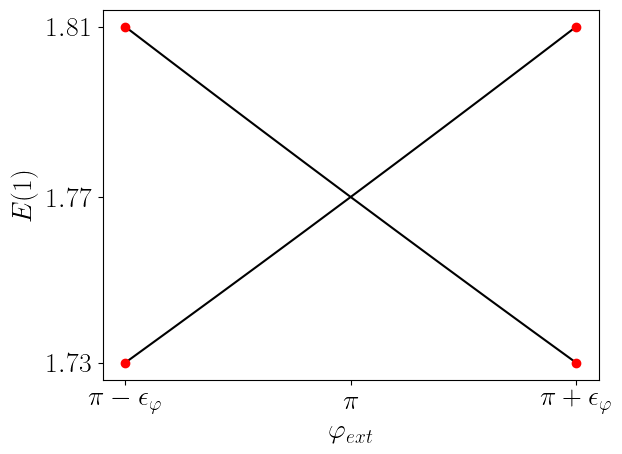

In [6]:
#Plot 1 
#Energiesphi = np.array(Energies)
#np.save('Energiesphi.npy', Energiesphi)
plt.plot(phi_ext,Energies,c="k")
plt.plot(2.991592653589793,1.730608054707133, 'ro')
plt.plot(2.991592653589793,1.8143843097813455, 'ro')
plt.plot(3.2915926535897913,1.7306080547069431 , 'ro')
plt.plot(3.2915926535897913,1.8143843097812717, 'ro')
#plt.ylim(1.5,4.2)
plt.xlabel(r'$\varphi_{ext}$')
plt.ylabel('$E (1)$', labelpad=7.0)
plt.xticks([np.pi-0.15,np.pi,np.pi+0.15],[r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
plt.yticks([1.7306080547068754,1.7719316405394376,1.8143843097812224],[r"$1.73$",r"$1.77$",r"$1.81$"])
#plt.savefig('Energies_vs_phiext_M50N125_INTNO2.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [7]:
#Calculations 2 

for phi2 in phi_ext:
    print("Step for phi_ext = ",phi2)
    H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng,phi2,alpha2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2,vects2=np.linalg.eigh(H2)
    vals2, _ = eigsh(H2, k=2, which='SA')
    #vals2,_=np.linalg.eigh(H2)
    print(vals2[0],vals2[1])
    print("Eigenvalues calculated")
    Energies2.append(vals2)

Step for phi_ext =  2.991592653589793
Hamiltonian built, len(H)= 741321
0.2730981993500224 0.2771867907259436
Eigenvalues calculated
Step for phi_ext =  3.021592653589793
Hamiltonian built, len(H)= 741321
0.27350148076205494 0.27677338325547224
Eigenvalues calculated
Step for phi_ext =  3.051592653589793
Hamiltonian built, len(H)= 741321
0.2739062256729879 0.27636075308072133
Eigenvalues calculated
Step for phi_ext =  3.0815926535897926
Hamiltonian built, len(H)= 741321
0.2743123518826532 0.2759489894790409
Eigenvalues calculated
Step for phi_ext =  3.1115926535897924
Hamiltonian built, len(H)= 741321
0.2747197761507411 0.27553818075049447
Eigenvalues calculated
Step for phi_ext =  3.1415926535897922
Hamiltonian built, len(H)= 741321
0.2751284142050647 0.27512841420509226
Eigenvalues calculated
Step for phi_ext =  3.171592653589792
Hamiltonian built, len(H)= 741321
0.27471977615074056 0.2755381807505163
Eigenvalues calculated
Step for phi_ext =  3.201592653589792
Hamiltonian built, len

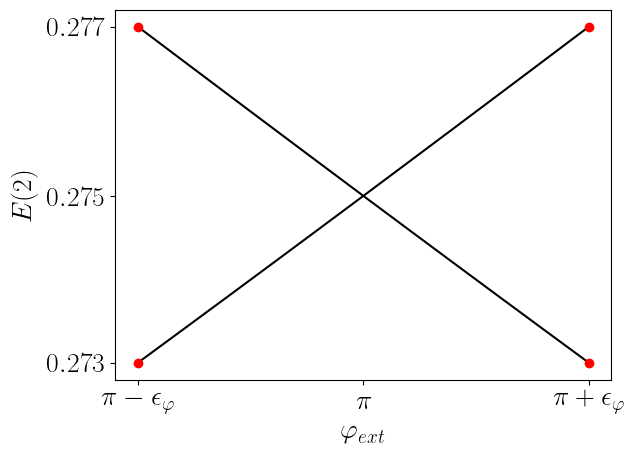

In [8]:
#Plot 2 
#Energies2phi = np.array(Energies2)
#np.save('Energies2phi.npy', Energies2phi)
plt.plot(phi_ext,Energies2,c="k")
#plt.ylim(0.25,0.7)
plt.plot(2.991592653589793,0.2730981993500046, 'ro')
plt.plot(2.991592653589793,0.2771867907259485, 'ro')
plt.plot(3.2915926535897913,0.2730981993500271 , 'ro')
plt.plot(3.2915926535897913,0.277186790725937, 'ro')
plt.xlabel(r'$\varphi_{ext}$')
plt.ylabel('$E (2)$',labelpad=7.0)
plt.xticks([np.pi-0.15,np.pi,np.pi+0.15],[r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
plt.yticks([0.273098199350034,0.2751284142050462,0.27718679072594654],[r"$0.273$",r"$0.275$",r"$0.277$"])
#plt.savefig('Energies2_vs_phiext_M50N125_INTNO2.pdf')
plt.show()